In [1]:
import pyastar2d
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## Testing Astar algo

In [2]:
def pose_to_pixel(pose, map_dimension, map_resolution):
    morigin = map_dimension / 2.0
    # pose maps from - map_dimension : map_dimension
    map = lambda old_value, old_min, old_max, new_min, new_max: ((old_value - old_min) / (old_max - old_min)) * (
            new_max - new_min) + new_min
    pixel_x = map(pose[0], morigin, -morigin,
                  1, (map_dimension / map_resolution))
    pixel_y = map(pose[1], morigin, -morigin,
                  1, (map_dimension / map_resolution))
    return int(pixel_x), int(pixel_y)

Astar_map = np.zeros((42,42))
# obstacles_list = [[3,5],[6,8]]
obstacles_list = [[1.263360417200946,0.0020384957378782728],
                 [0.5642634185899403,0.15130855872334747],
                 [0.4764186488464385,-0.06406046166998676],
                 [1.1773514512515824,1.2003583309203272],
                 [-0.9899534267216299,1.2601156570273875],
                [-0.7239515499821958,0.2420367534674582],
                 [-1.126367648718127,-0.375520213247808],
                  [ -0.5253043025326287,-0.753413253930154],
                [0.453857178539237,-1.3234922891692935],
                [0.03818983479128792,1.3187977090865848]]
obstacles_map_frame = []
map_resolution = 0.1  # metres / pixel
map_dimension = 1.4 * 3  # metres
for item in list(obstacles_list):
    x_obs, y_obs = pose_to_pixel(item, map_dimension, map_resolution)
    obstacles_map_frame.append([x_obs, y_obs])
print(obstacles_map_frame)
def pad_map(input_arr, obstacle_list, pad_max=np.inf, offset=42/2):
        for coord in obstacle_list:
            try:
                input_arr[coord[0], coord[1]] = pad_max
            except:
                pass
        input_arr[:, 0] = pad_max
        input_arr[:, input_arr.shape[0]-1] = pad_max
        input_arr[0, :] = pad_max
        input_arr[input_arr.shape[0]-1, :] = pad_max
        # input_arr should be an array of [0,1] only
        for rows in range(input_arr.shape[0]):
            for cols in range(input_arr.shape[1]):
                if input_arr[rows,cols] != pad_max:
                    # Build a list of all the euclidean distances and find the shortest one
                    euc_list = []
                    for coord in obstacle_list:
                        euc = 2 / (0.1 * np.sqrt(np.sum((np.array(coord) - np.array([rows,cols])) ** 2)) **0.9)
                        euc_list.append(euc)
                    input_arr[rows,cols] = max(euc_list)
        return np.array(input_arr, dtype=np.float32)
Astar_map = pad_map(Astar_map, obstacles_map_frame)

[[9, 21], [15, 20], [16, 22], [10, 9], [31, 9], [28, 19], [32, 25], [26, 28], [17, 34], [21, 8]]


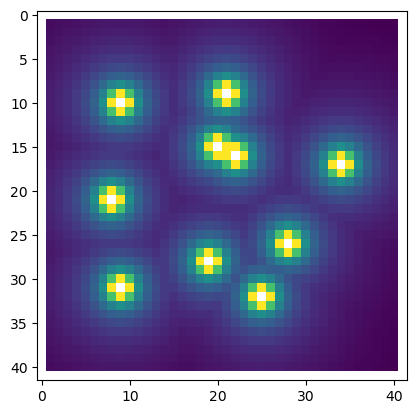

In [3]:
plt.imshow(Astar_map)

In [4]:
start = [40,2]
goal = [14,19]
path = pyastar2d.astar_path(Astar_map, start, goal, allow_diagonal=True)

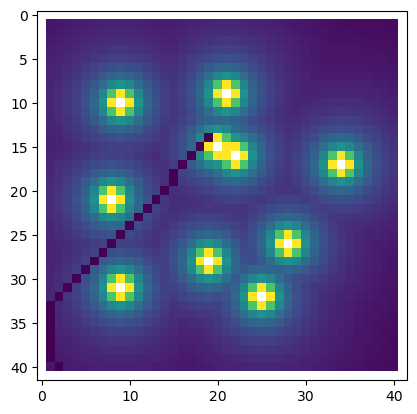

In [5]:
# print(path)
for item in path:
    Astar_map[item[0]][item[1]] = 1
plt.imshow(Astar_map)